In [0]:
import keras
import numpy as np
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.initializers import random_normal
from matplotlib import pyplot as plt
from keras.layers import Flatten, Dense, Dropout, MaxPooling2D, Input
from keras.layers.convolutional import AveragePooling2D, Conv2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [0]:
def create_model(input_shape, output_shape):
  main_input = Input(shape=input_shape, dtype='float32', name='main_input')
  h1 = Dense(64,activation = 'relu')(main_input)
  h2 = Dense(64, activation = 'relu')(h1)
  h3 = Dense(64, activation = 'relu')(h2)
  h4 = Dense(32, activation = 'relu')(h3)
  h5 = Dense(32, activation = 'relu')(h4)
  h6 = Dense(32, activation = 'relu')(h5)
  

  concat = keras.layers.concatenate([h1,h2,h3,h4,h5,h6])
  den = Dense(128, activation = 'relu')(concat)
  main_output = Dense(output_shape, activation = 'softmax', name = 'main_output')(den)
  model = Model(inputs=[main_input], outputs=[main_output])
  return model

In [4]:
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 24s 0us/step


In [0]:
batch_size = 128
epochs = 50
num_classes = np.max(y_train) - np.min(y_train) + 1
s = 2

In [0]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3]) 
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255
x_test /= 255

In [0]:
model = create_model(x_train[0].shape, y_train[0].shape[0])

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(), metrics = ['accuracy'])

In [9]:
history = model.fit(x_train, y_train,
                                batch_size = batch_size,
                                epochs = epochs,
                                verbose = 1,
                                validation_data = (x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 88us/step - loss: 4.5816 - acc: 0.0212 - val_loss: 4.5442 - val_acc: 0.0265
Epoch 2/50
50000/50000 [==============================] - 4s 79us/step - loss: 4.4645 - acc: 0.0384 - val_loss: 4.3695 - val_acc: 0.0504
Epoch 3/50
50000/50000 [==============================] - 4s 76us/step - loss: 4.2501 - acc: 0.0614 - val_loss: 4.1599 - val_acc: 0.0717
Epoch 4/50
50000/50000 [==============================] - 4s 74us/step - loss: 4.0897 - acc: 0.0771 - val_loss: 4.0452 - val_acc: 0.0807
Epoch 5/50
50000/50000 [==============================] - 4s 74us/step - loss: 3.9871 - acc: 0.0907 - val_loss: 3.9701 - val_acc: 0.0985
Epoch 6/50
50000/50000 [==============================] - 4s 74us/step - loss: 3.9040 - acc: 0.1050 - val_loss: 3.8986 - val_acc: 0.1038
Epoch 7/50
50000/50000 [==============================] - 4s 73us/step - loss: 3.8373 - acc: 0.1169 - val_loss: 3.8706 - val_acc

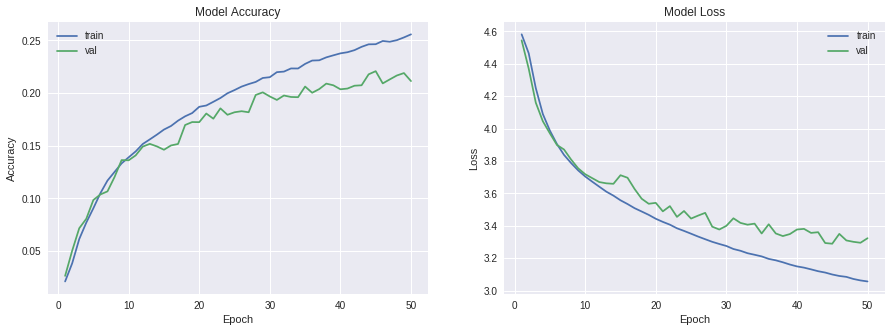

In [10]:
model_history = history
fig, axs = plt.subplots(1,2,figsize=(15,5))
# summarize history for accuracy
axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
axs[0].legend(['train', 'val'], loc='best')
# summarize history for loss
axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
axs[1].legend(['train', 'val'], loc='best')
plt.savefig('Cifar10_20.png')
plt.show()